In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# FUNCTION randomArrays
def randomArrays(n, mag, ku):
    for i in range(0,int(n),1):
        thet = np.pi*np.random.rand() # Polar angle theta
        phi = 2.0*np.pi*np.random.rand() # Azimutal angle phi
         
        # Initial random directions of nanoparticles
        mag[i] = [np.sin(thet)*np.cos(phi), np.sin(thet)*np.sin(phi), np.cos(thet)]
        
        thet = np.pi*np.random.rand() # Polar angle theta
        phi = 2.0*np.pi*np.random.rand() # Azimutal angle phi
    
        # Uniaxial random directions of nanoparticles
        ku[i] = np.array([np.sin(thet)*np.cos(phi), np.sin(thet)*np.sin(phi), np.cos(thet)])
    return mag, ku

In [12]:
# FUNCTION magTotalSet
def magTotalSet(magTotal, mag, vecH, n):
    for i in range(0,int(n),1):
        magTotal = magTotal + np.dot(mag[i],vecH)
    return magTotal

In [13]:
# FUNCTION hextCalc
def hextCalc(hext,dh,hext_stg,i):
    if i <= hext_stg[0,2]-1:
        dh = (hext_stg[0,1]-hext_stg[0,0])/(hext_stg[0,2]-1.0)
    elif i <= hext_stg[0,2]+hext_stg[1,2]-1:
        dh = (hext_stg[1,1]-hext_stg[1,0])/(hext_stg[1,2]-1.0)
    else:
        dh = (hext_stg[2,1]-hext_stg[2,0])/(hext_stg[2,2]-1.0)
    return hext+dh

In [14]:
# FUNCTION abc
def abc(vecH,hext,dThet,ku,mag,magAux):
    #randN = round(np.random.rand()*(n-1)) #Random Nanoparticle
    ei = -0.5*(np.dot(ku,mag))**2 - hext*np.dot(mag,vecH)
    magAux = mag
    magAux = genedThet(magAux,dThet)[0]
    ej = -0.5*(np.dot(ku,magAux))**2 - hext*np.dot(magAux,vecH)
    t = 0.1
    if ej<=ei:
        mag = magAux
    else:
        nrj = np.random.rand()
        if nrj < np.exp((ei-ej)/t):
            mag = magAux        
    return mag, magAux    

In [15]:
# FUNCTION genedThet
def genedThet(magAux,dThet):
    # Declaring vector A and B
    A = np.empty(shape=(1,3))
    B = np.empty(shape=(1,3))
    # Setting thet and phi
    thet = dThet*np.random.rand() 
    phi = 2.0*np.pi*np.random.rand() 
    # Building vector A
    mx = magAux[0]
    my = magAux[1]
    mz = magAux[2]
    if mx == 0.0:
        A = np.array([[0.0,-mz/np.sqrt(mz**2+my**2),my/np.sqrt(mz**2+my**2)]])
    elif my == 0.0:
        A = np.array([[-mz/np.sqrt(mz**2+mx**2),0.0,mx/np.sqrt(mz**2+mx**2)]])
    else:
        A = np.array([[-mz*mx/np.sqrt(my**2+mx**2),-mz*my/np.sqrt(mx**2+my**2),np.sqrt(mx**2+my**2)]])
    # Buiding vector B
    B = np.array([[A[0,1]*mz - A[0,2]*my,-A[0,0]*mz + A[0,2]*mx,A[0,0]*my - A[0,1]*mx]])
    magAux = np.cos(thet)*magAux + np.sin(thet)*np.cos(phi)*A + np.sin(thet)*np.sin(phi)*B
    return magAux

In [16]:
# READING INPUT DATA
#n = input("Write the number of nanoparticles")
#mcs = input("Write the number of Monte Carlo steps")
#dThet = float(input("Write the angle dThet in degrees"))
n = 1000
mcs = 20
dThet = 10
dThet = dThet*np.pi/180.0

# DECLARING ARRAYS
mag = np.empty(shape=(int(n),3))
ku = np.empty(shape=(int(n),3))
vecH = np.empty(shape=(1,3))
magAux = np.empty(shape=(1,3))
hextStg = np.empty(shape=(3,3))

In [21]:
# FILLING ARRAYS mag, ku
mag, ku, xyz = randomArrays(np.pi,n)
magInit = mag

TypeError: randomArrays() missing 1 required positional argument: 'ku'

In [19]:
# FILLING ARRAYS mag, ku
mag, ku = randomArrays(n,mag,ku)
dfMag = pd.DataFrame(data=mag[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY
dfXyz = pd.DataFrame(data=xyz[0:,0:],columns=['x','y','z']) 

NameError: name 'xyz' is not defined

NameError: name 'dfXyz' is not defined

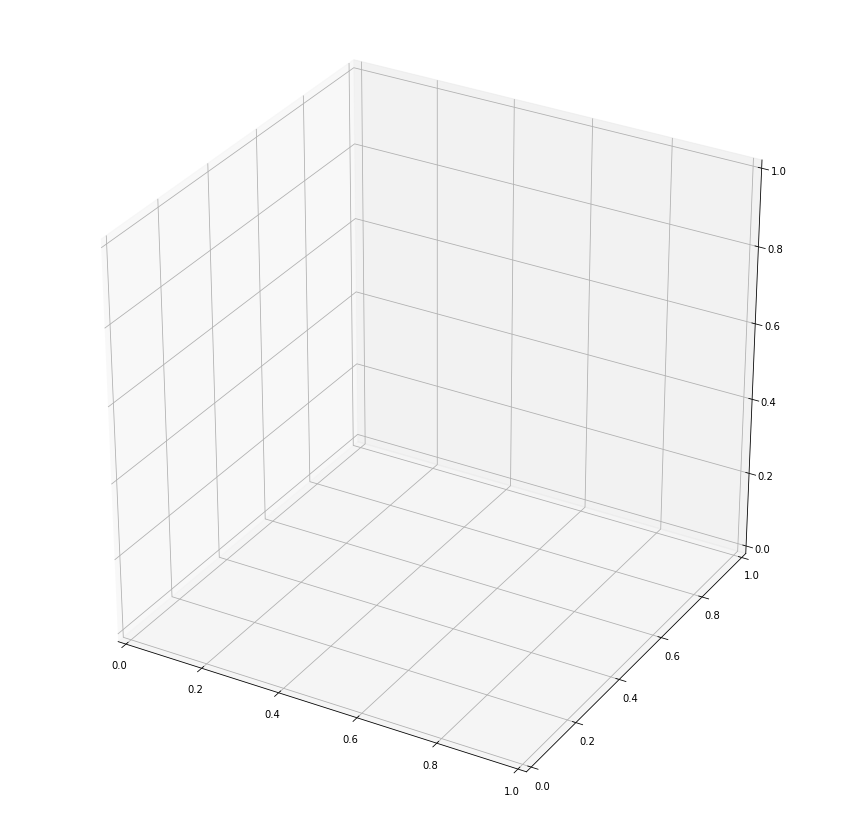

In [18]:
#Normal 3D plot
%matplotlib inline 
#Interactive 3D plot
#%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfMag.x, dfMag.y, dfMag.z, color = 'r', marker = 'o', alpha = 0.5)
#ax.quiver(*dfMag[:-1].T.values, *(dfMag.shift(-1)-dfMag)[:-1].T.values , length=0.1)
ax.quiver(dfXyz.x, dfXyz.y, dfXyz.z,dfMag.x, dfMag.y, dfMag.z, length=0.1, color='g')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
# INITIALIZING VARIABLES
vecH = np.array([1.0,0.0,0.0]) # FIELD DIRECTION
hext_stg = np.array([
    [0.0,1.0,60.0], # INITIAL, FINAL, STEP NUMBER
    [1.0,-1.0,100.0],
    [-1.0,1.0,100.0]
])
dh = (1.0-0.0)/100.0
magTotal = 0.0
hext = 0.0

In [ ]:
# SETTING magTotal
magTotal = magTotalSet(magTotal, mag, vecH,n)

In [ ]:
# FILLING DATAFRAME
df = pd.DataFrame([
    [hext, magTotal]
], columns = ["hext", "MagTotal"])

In [ ]:
# INITIALIZING VARIABLE nhext
nhext = int(hext_stg[0,2]+hext_stg[1,2]+hext_stg[2,2]-3.0)

In [ ]:
# SETTING magTotal AND DATAFRAME USING MARKOV CHAINS
for i in range(0,nhext):
    hext = hextCalc(hext,dh,hext_stg,i)
    for step in range(0,int(mcs)):
        for nanoparticle in range(0,int(n)):
            randN = round(np.random.rand()*(n-1)) #Random Nanoparticle
            mag[randN], magAux = abc(vecH, hext, dThet, ku[randN], mag[randN], magAux)     
    magTotal = 0.0
    for j in range(0,int(n)):
        magTotal = magTotal + np.dot(mag[j], vecH)
    print(i,hext,magTotal)
    df.loc[i+1]=[hext,magTotal]

In [ ]:
df

In [ ]:
df.plot.scatter(x='hext',y='MagTotal',alpha=0.2)
import matplotlib.pyplot as plt
plt.show()